# IMPORTs

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Built-In Imports
import warnings
import sys
import os
warnings.filterwarnings('ignore')
%matplotlib inline

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

print("... IMPORTS COMPLETE ...")

... IMPORTS COMPLETE ...


# Data Loading

In [ ]:
print("... Contents of data directory are:")
DATA_DIR = '/content/drive/MyDrive/FYP2'
for file in tf.io.gfile.glob(os.path.join(DATA_DIR, "*")): print(f"\t--> {file}")


... Contents of data directory are:
	--> /content/drive/MyDrive/FYP2/public_timeseries_testing_util.py
	--> /content/drive/MyDrive/FYP2/supplemental_clinical_data.csv
	--> /content/drive/MyDrive/FYP2/train_clinical_data.csv
	--> /content/drive/MyDrive/FYP2/train_peptides.csv
	--> /content/drive/MyDrive/FYP2/train_proteins.csv
	--> /content/drive/MyDrive/FYP2/amp-parkinsons-disease-progression-prediction.zip
	--> /content/drive/MyDrive/FYP2/example_test_files
	--> /content/drive/MyDrive/FYP2/amp_pd_peptide


This is a Python code that prints the contents of a directory. Here's a step-by-step explanation of what the code does:

1. The first line of code prints a message to indicate that the contents of the directory are going to be printed.

2. The second line of code creates a string variable `DATA_DIR` that contains the path to the directory that we want to inspect. The directory path is `'/content/drive/MyDrive/FYP2'`.

3. The third line of code uses a `for` loop to iterate over each file in the directory. It does this by using the `tf.io.gfile.glob()` function, which returns a list of file paths that match a pattern. In this case, the pattern is `os.path.join(DATA_DIR, "*")`, which joins the directory path with a wildcard `*` to match all files in the directory.

4. For each file path returned by `tf.io.gfile.glob()`, the loop prints a message that includes the file path. The message is constructed using an f-string, which allows us to embed the value of the `file` variable in the string using curly braces `{}`.

In [ ]:
print("\n... TRAIN DATA ...")

print("\n... Loading Train Proteins Data From CSV File ...\n\n")
train_proteins = pd.read_csv(os.path.join(DATA_DIR, "train_proteins.csv"))
display(train_proteins.head())

print("\n... Loading Train Peptide Data From CSV File ...\n\n")
train_peptides = pd.read_csv(os.path.join(DATA_DIR, "train_peptides.csv"))
display(train_peptides.head())

print("\n... Loading Train Clinical Data From CSV File ...\n\n")
train_cd = pd.read_csv(os.path.join(DATA_DIR, "train_clinical_data.csv"))
display(train_cd.head())

print("\n... Loading Supplemental Clinical Data From CSV File ...\n\n")
train_scd = pd.read_csv(os.path.join(DATA_DIR, "supplemental_clinical_data.csv"))
display(train_scd.head())


... TRAIN DATA ...

... Loading Train Proteins Data From CSV File ...




visit_id  visit_month  patient_id UniProt       NPX
0     55_0            0          55  O00391   11254.3
1     55_0            0          55  O00533  732430.0
2     55_0            0          55  O00584   39585.8
3     55_0            0          55  O14498   41526.9
4     55_0            0          55  O14773   31238.0


... Loading Train Peptide Data From CSV File ...




visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance  
0                           NEQEQPLGQWHLS           11254.3  
1                             GNPEPTFSWTK          102060.0  
2                         IEIPSSVQQVPTIIK          174185.0  
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  
4                            SMEQNGPGLEYR           30838.7


... Loading Train Clinical Data From CSV File ...




visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0     55_0          55            0     10.0      6.0     15.0      NaN   
1     55_3          55            3     10.0      7.0     25.0      NaN   
2     55_6          55            6      8.0     10.0     34.0      NaN   
3     55_9          55            9      8.0      9.0     30.0      0.0   
4    55_12          55           12     10.0     10.0     41.0      0.0   

  upd23b_clinical_state_on_medication  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                  On  
4                                  On


... Loading Supplemental Clinical Data From CSV File ...




visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0     35_0          35            0      5.0      3.0     16.0      0.0   
1    35_36          35           36      6.0      4.0     20.0      0.0   
2     75_0          75            0      4.0      6.0     26.0      0.0   
3    75_36          75           36      1.0      8.0     38.0      0.0   
4    155_0         155            0      NaN      NaN      0.0      NaN   

  upd23b_clinical_state_on_medication  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                  On  
4                                 NaN

In [ ]:
all(train_proteins[['visit_id', 'UniProt']].value_counts() == 1)

True

# Explanation 
This code checks if all the rows in a subset of the `train_proteins` Pandas DataFrame are unique. Here is a step-by-step explanation of what the code does:

1. The code selects two columns from the `train_proteins` DataFrame: `visit_id` and `UniProt`. The double square brackets `[[...]]` indicate that we are selecting columns as a list of column names.

2. The `value_counts()` method is then called on this subset of the DataFrame. This method returns a Pandas Series object containing the count of unique combinations of `visit_id` and `UniProt` in the DataFrame.

3. The `== 1` operator compares each count in the Series to the value 1 and returns a boolean value indicating whether the count is equal to 1.

4. The `all()` function is then called on this boolean Series. This function returns `True` if all values in the Series are `True`, and `False` otherwise.

In summary, the code checks if all rows in the `train_proteins` DataFrame that have unique combinations of` visit_id `and` UniProt`. If all rows have unique combinations, the code returns `True`.

*I made sure that my visit_id and protein coded pairs are unique in the code above. And now I can proceed with merging all the available data into a convinient form of a single dataframe for our upcoming regression models.*

In [ ]:
df_p = train_peptides.merge(train_proteins[['visit_id', 'UniProt', 'NPX']], on=['visit_id','UniProt'], how='left')
df_p.head()

visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance       NPX  
0                           NEQEQPLGQWHLS           11254.3   11254.3  
1                             GNPEPTFSWTK          102060.0  732430.0  
2                         IEIPSSVQQVPTIIK          174185.0  732430.0  
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  732430.0  
4                            SMEQNGPGLEYR           30838.7  732430.0

# Explanation
This code merges two Pandas dataframes `train_peptides` and `train_proteins` on specific columns `visit_id` and `UniProt`. Here is a step-by-step explanation of what the code does:

1. The code starts by selecting a subset of columns from the `train_proteins` dataframe using the double square bracket notation` [[...]]`. Specifically, it selects the columns `visit_id`, `UniProt`, and `NPX`.

2. The `merge()` function is then called on the `train_peptides` dataframe, with the `train_proteins` subset dataframe passed as the second argument. The on parameter specifies the columns on which to merge the dataframes, in this case, `visit_id` and `UniProt`. The `how `parameter specifies the type of merge to perform, which is a left join (`how='left'`) in this case.

2. The resulting merged dataframe is assigned to a new variable `df_p`. Finally, the `head()` method is called on `df_p` to display the first few rows of the merged dataframe.

In summary, the code merges two dataframes, `train_peptides` and `train_proteins`, on specific columns and returns a new dataframe that includes all rows from the left dataframe (`train_peptides`) and the matching rows from the right dataframe (`train_proteins`) based on the `visit_id` and `UniProt` columns. The resulting dataframe is displayed with the `head()` method.

*I though it made sense to transfer proteins' NPX value to peptide data on merge, since each protein could consist of multiple peptides.*

In [ ]:
#I've rewritten visit_id for supplemental clinical data since it seems that its visit_id was different from convention in other files
train_scd['visit_id'] = train_scd['patient_id'].astype(str) + "_"+ train_scd['visit_month'].astype(str)

#Here we combine both main and supplemental clinical data into a single dataframe
df_cd = pd.concat([train_cd, train_scd], ignore_index=True)
display(df_cd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             4838 non-null   object 
 1   patient_id                           4838 non-null   int64  
 2   visit_month                          4838 non-null   int64  
 3   updrs_1                              4624 non-null   float64
 4   updrs_2                              4622 non-null   float64
 5   updrs_3                              4808 non-null   float64
 6   updrs_4                              2872 non-null   float64
 7   upd23b_clinical_state_on_medication  2410 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 302.5+ KB


None

This code combines two Pandas dataframes `train_cd` and `train_scd` into a single dataframe `df_cd`. Here is a step-by-step explanation of what the code does:

1. The code starts by creating a new column `visit_id` in the `train_scd` dataframe. The column is created by concatenating two existing columns, `patient_id` and visit_month, with an underscore `_` in between. The `astype(str)` method is used to convert the columns to string type before concatenating them.

2. The `concat()` function is then called on the `train_cd` and `train_scd` dataframes, with the `ignore_index` parameter set to True. This function combines the two dataframes vertically, meaning that it stacks them one on top of the other to create a single dataframe. The` ignore_index` parameter ensures that the resulting dataframe has a new set of row indices instead of retaining the indices from the original dataframes.

3. The resulting merged dataframe is assigned to a new variable `df_cd`. Finally, the `info()` method is called on `df_cd` to display information about the merged dataframe, such as the number of rows and columns, the data types of each column, and the amount of memory used by the dataframe.

In summary, the code creates a new column `visit_id `in the `train_scd` dataframe, combines the train_cd and `train_scd `dataframes into a single dataframe `df_cd`, and displays information about the resulting merged dataframe.

*We can also combine all UPDRS columns (as it is in test) into 1 columns like following if it will be needed. This is just an example, I will leave my dataframe with multiple columns of UPDRS because if we melt them now, we will then need to encode them.*

In [ ]:
df_cd.melt(id_vars=['visit_id', 'patient_id', 'visit_month', 'upd23b_clinical_state_on_medication'], 
                   var_name='updrs', value_name='rating')

visit_id  patient_id  visit_month upd23b_clinical_state_on_medication  \
0          55_0          55            0                                 NaN   
1          55_3          55            3                                 NaN   
2          55_6          55            6                                 NaN   
3          55_9          55            9                                  On   
4         55_12          55           12                                  On   
...         ...         ...          ...                                 ...   
19347   65382_0       65382            0                                 NaN   
19348   65405_0       65405            0                                 NaN   
19349   65405_5       65405            5                                 NaN   
19350   65530_0       65530            0                                 NaN   
19351  65530_36       65530           36                                  On   

         updrs  rating  
0      updrs_1    10.0  
1      updrs_1    10.0  
2      updrs_1     8.0  
3      updrs_1     8.0  
4      updrs_1    10.0  
...        ...     ...  
19347  updrs_4     NaN  
19348  updrs_4     0.0  
19349  updrs_4     NaN  
19350  updrs_4     0.0  
19351  updrs_4     4.0  

[19352 rows x 6 columns]

This code transforms the `df_cd` dataframe from a wide format to a long format using the `melt()` function from Pandas. Here is a step-by-step explanation of what the code does:

The `melt()` function is called on the `df_cd` dataframe.

The `id_vars` parameter is set to a list of column names that should remain in the resulting dataframe as identifying variables. In this case, the `visit_id`, `patient_id`, `visit_month`, and `upd23b_clinical_state_on_medication` columns are specified.

The` var_name` parameter is set to the name of the new column that will contain the column headers of the original dataframe. In this case, it is set to `'updrs'`.

The value_name parameter is set to the name of the new column that will contain the cell values of the original dataframe. In this case, it is set to `'rating'`.

The resulting melted dataframe is assigned to a new variable called `df_cd_melted`.

In summary, this code takes the original `df_cd` dataframe, which has some columns with multiple values, and converts it into a long format where each row contains a single value for one of those columns. The resulting dataframe `df_cd_melted` has four columns: `visit_id`, `patient_id`, `visit_month`, and `upd23b_clinical_state_on_medication`, and two additional columns, `updrs` and `rating`, where `updrs` contains the original column headers of the melted columns, and `rating` contains the cell values of the melted columns.

In [ ]:
df_all = df_p.merge(df_cd[['visit_id','updrs_1','updrs_2','updrs_3','updrs_4','upd23b_clinical_state_on_medication']], on=['visit_id'], how='left')
df_all.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981834 entries, 0 to 981833
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             981834 non-null  object 
 1   visit_month                          981834 non-null  int64  
 2   patient_id                           981834 non-null  int64  
 3   UniProt                              981834 non-null  object 
 4   Peptide                              981834 non-null  object 
 5   PeptideAbundance                     981834 non-null  float64
 6   NPX                                  981834 non-null  float64
 7   updrs_1                              941744 non-null  float64
 8   updrs_2                              941744 non-null  float64
 9   updrs_3                              932624 non-null  float64
 10  updrs_4                              495530 non-null  float64
 11  upd23b_clinic

In [ ]:
print("\n.... Total patients: ", train_peptides.patient_id.nunique())

print("\n.... Total number of visits:", train_proteins['visit_id'].nunique())

print("\n.... Total proteins: ", train_proteins.UniProt.nunique())

print("\n.... Total peptides: ", train_peptides.Peptide.nunique())

print("\n.... Months counts:")
print(train_proteins.visit_month.value_counts())


.... Total patients:  248

.... Total number of visits: 1113

.... Total proteins:  227

.... Total peptides:  968

.... Months counts:
0      40587
12     37467
24     36225
36     31156
48     28838
6      25991
60     17572
84      6288
72      4407
18      1657
108      855
3        641
96       423
54       418
30       216
Name: visit_month, dtype: int64


* There are 248 patients in the dataset.
* There are 1,113 visit_id, which means each patient visited around 4.48 times on average. This means, on average, each patient has 4~5 records.
* There are often several peptides per protein. You should merge peptides dataset to proteins.
* There are 227 unique UniProt ID, while there are 968 types of peptide.
* Data for some patients goes as far as 108 months or 9 years

Also, I wanted to share one of the strangest things I found in peptide chains. There are these UniMod numbers in brackets that I'm assuming are the modifications of amino acids, but further research is needed on this.

In [ ]:
df_all['Peptide'].str.extract(r"(.\(.*?\))", expand=False).value_counts()


C(UniMod_4)     302757
M(UniMod_35)     25932
Name: Peptide, dtype: int64

# EDA

Spearman correlations as below for EDA:



<AxesSubplot:>

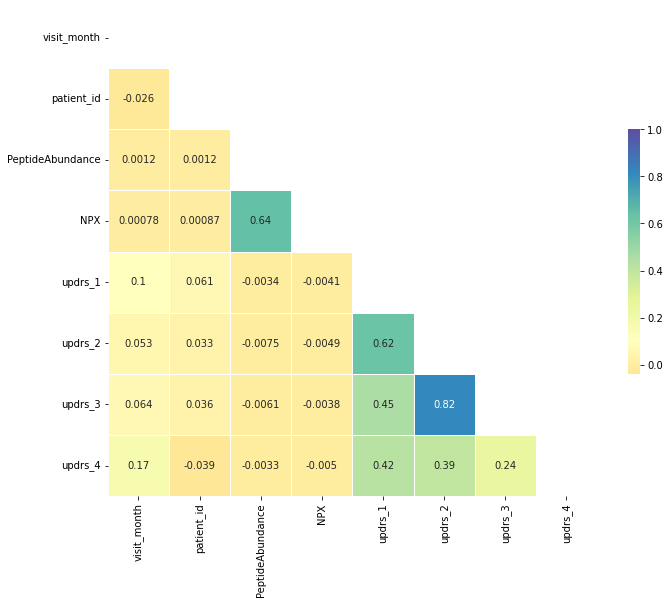

In [ ]:
corr = df_all.corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=1, center=0.1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

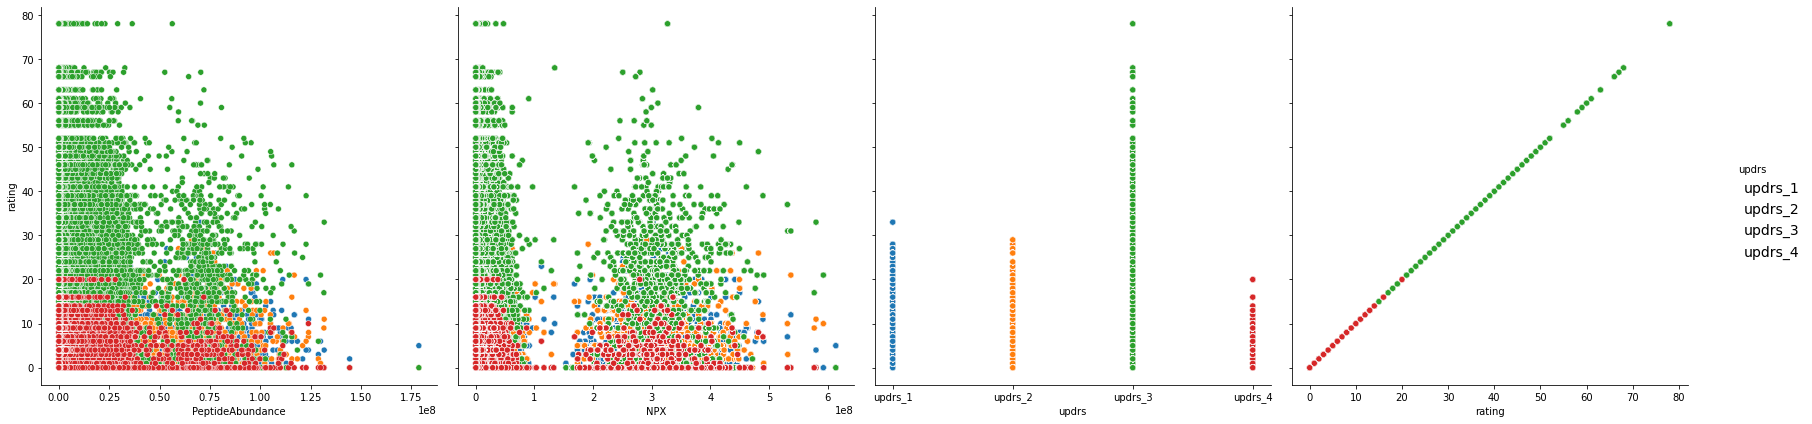

In [ ]:
df_a = df_all.melt(id_vars=['visit_id', 'patient_id', 'visit_month', 'UniProt', 'Peptide', 'PeptideAbundance', 'NPX', 'upd23b_clinical_state_on_medication'], 
                   var_name='updrs', value_name='rating')
g = sns.PairGrid(df_a, y_vars=["rating"], 
                 x_vars=df_a.columns.drop(['visit_month', 'patient_id', 'visit_id', 'UniProt', 'Peptide', 'upd23b_clinical_state_on_medication']), 
                 height=6, hue='updrs')
g = g.add_legend(fontsize=14)
g.map(sns.scatterplot)

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_all, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]